## Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import email, os, glob
import seaborn as sns

In [2]:
path = 'mail/'

In [3]:
easy_ham_paths = glob.glob(path+'/easy_ham/*')
easy_ham_2_paths = glob.glob(path+'/easy_ham_2/*')
hard_ham_paths = glob.glob(path+'/hard_ham/*')
spam_paths = glob.glob(path+'/spam/*')
spam_2_paths = glob.glob(path+'/spam_2/*')

In [4]:
def get_email_content(email_path):
    file = open(email_path, encoding='latin1')
    try:
        msg = email.message_from_file(file)
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                return part.get_payload()
    except:
        print(e)

In [5]:
def get_email_content_bulk(email_paths):
    email_contents = [get_email_content(o) for o in email_paths]
    return email_contents

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

Here we will put the ham and spam file names into two lists, and use `train_test_split` on each email in the list to ensure distributions of ham and spam in training and testing sets are equal.

In [33]:
ham = [
    easy_ham_paths,
    easy_ham_2_paths,
    hard_ham_paths
]
spam = [
    spam_paths,
    spam_2_paths
]

In [34]:
X_train = []
X_test = []

for i in ham:
    a, b = train_test_split(i)
    X_train.extend(a)
    X_test.extend(b)

ham_train_count = len(X_train)
ham_test_count = len(X_test)

for u in spam:
    a, b, = train_test_split(u)
    X_train.extend(a)
    X_test.extend(b)
    
spam_train_count = len(X_train) - ham_train_count
spam_test_count = len(X_test) - ham_test_count

In [35]:
y_train = np.concatenate((np.zeros(ham_train_count), np.ones(spam_train_count)), axis=None)
y_test = np.concatenate((np.zeros(ham_test_count), np.ones(spam_test_count)), axis=None)

In [36]:
y_train.shape, y_test.shape

((4536,), (1516,))

In [37]:
len(X_train)

4536

The ordering of the emails in the sets are not random, all hams come first, followed by all the spams. To imporve training performance, it is best to have randomise orders of instances. 

In [38]:
train_shuffle_index = np.random.permutation(np.arange(0, len(X_train)))
test_shuffle_index = np.random.permutation(np.arange(0, len(X_test)))

In [39]:
X_train = np.array(X_train)[train_shuffle_index]
y_train = np.array(y_train)[train_shuffle_index]
X_test = np.array(X_test)[test_shuffle_index]
y_test = np.array(y_test)[test_shuffle_index]

Remember, for now the `X_train` and `X_test` only contain email file names, not the actual content of the emails. We need to load the file into the corresponding sets 

In [40]:
X_train = get_email_content_bulk(X_train)
X_test = get_email_content_bulk(X_test)

In [41]:
len(X_train)

4536

In [42]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [43]:
X_train, y_train = remove_null(X_train, y_train)
X_test, y_test = remove_null(X_test, y_test)

In [45]:
X_train.shape, X_test.shape

((3799,), (1278,))

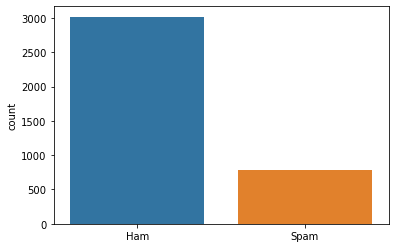

In [46]:
df = pd.DataFrame(y_train, columns=['type'])
fig, ax = plt.subplots()
sns.countplot(x='type', data=df)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Ham', 'Spam'])
plt.xlabel('')
plt.show()

## Preprocessing 

In [47]:
import re
import string

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [48]:
def remove_hyperlink(word):
    return re.sub(r"https\S+", "", word)

def to_lower(word):
    return word.lower()

def remove_number(word):
    return re.sub(r"\d+", "", word)

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    return word.strip()

def replace_newline(word):
    return word.replace('\n', '')

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                     remove_number,
                     remove_punctuation,
                     remove_whitespace,
                     replace_newline,
                     to_lower]
    
    for util in cleaning_utils:
        sentence = util(sentence)
    return sentence

In [49]:
X_train = [clean_up_pipeline(i) for i in X_train]
X_test = [clean_up_pipeline(i) for i in X_test]

In [50]:
len(X_train), len(X_test)

(3799, 1278)

In [51]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [52]:
X_train = [word_tokenize(o) for o in X_train]
X_test = [word_tokenize(o) for o in X_test]

In [56]:
def remove_stop_words(words):
    return [i for i in words if i not in ENGLISH_STOP_WORDS]

def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words, word_lemmatizer]
    
    for util in cleaning_utils:
        words = util(words)        
        
    return words

In [57]:
X_train = [clean_token_pipeline(i) for i in X_train]
X_test = [clean_token_pipeline(i) for i in X_test]

In [60]:
X_train = [' '.join(i) for i in X_train]
X_test = [' '.join(i) for i in X_test]

In [62]:
X_train[0]

'fri sep guido van rossum wrotequite independently testing tuning algorithm id like tothink deploymenteventually individual postmaster able download aspambayes software distribution answer configuration questionsabout mail setup training false positive install itas filtera modest initial goal production tool caneasily used individual likely findindividuals willing risk postmastersmy impression precollected corpus fit individualsvery individual group collect corpusone problem come upp immediately individual lazyif currently spam ham day ill topress delete button spam ill happyto press spam button instead additionhave press ham button ham start lookmuch like win add time install setupthe machinery ill just hitting deletethe suggestion far hook deleteaction add message ham corpus problemswith ham bit skewed mail aroundwithout deleting counted secondly force ofhabit happen press delete key instead spam keyill end spam ham anywaysi like look way deal spam hamthe obvious thing trigger spam b

## Visualization

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

spam_email = np.array(X_train)[spam_train_index]
non_spam_email = np.array(X_train)[non_spam_train_index]

In [ ]:
plot_wordcloud(spam_email,title = 'Spam Email')

In [ ]:
plot_wordcloud(non_spam_email,title="Non Spam Email")

## Feature Extraction with Count Vectorizer

In [63]:
X_train = [o.split(" ") for o in X_train]
X_test = [o.split(" ") for o in X_test]

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
raw_sentences = [' '.join(o) for o in X_train]
count_vectorizer.fit(raw_sentences)

CountVectorizer()

In [73]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return count_vectorizer.transform(raw_sentences)

In [74]:
X_train_feature = convert_to_feature(X_train)
X_test_feature = convert_to_feature(X_test)

In [76]:
X_train_feature.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Gaussian NB

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [78]:
clf = GaussianNB()
clf.fit(X_train_feature.toarray(), y_train)

GaussianNB()

In [79]:
clf.score(X_test_feature.toarray(), y_test)

0.9514866979655712

In [80]:
clf.score(X_train_feature.toarray(), y_train)

0.9994735456699131

## Logistic Regression

In [82]:
log_clf = LogisticRegression()

In [83]:
log_clf.fit(X_train_feature.toarray(), y_train)

LogisticRegression()

In [84]:
log_clf.score(X_test_feature.toarray(), y_test)

0.9757433489827856

In [85]:
log_clf.score(X_train_feature.toarray(), y_train)

0.9936825480389576

## Model Evaluation

### - Naive Bayes

In [91]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, precision_score,recall_score

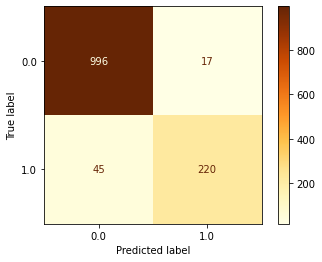

In [97]:
plot_confusion_matrix(clf, X_test_feature.toarray(), y_test, cmap='YlOrBr')
plt.show()

In [88]:
nb_predict = clf.predict(X_test_feature.toarray())

In [98]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, nb_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, nb_predict)))

Precision: 92.83%
Recall: 83.02%


### - Logistic Regression

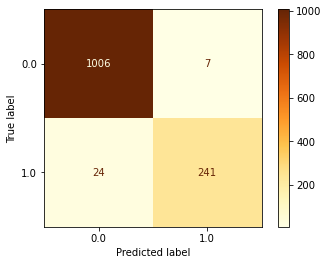

In [99]:
plot_confusion_matrix(log_clf, X_test_feature.toarray(), y_test, cmap='YlOrBr')
plt.show()

In [101]:
log_predict = log_clf.predict(X_test_feature.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, log_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, log_predict)))

Precision: 97.18%
Recall: 90.94%
